In [1]:
import pandas as pd

In [2]:
plantas = pd.read_csv('Datos67022163-5CD4-4BD4-A0F7-2E62921CE40E.csv')
plantas.head()

FechaPublicacion       Fecha CodigoUnidadGeneracion       NombreUnidad  \
0       2024-04-11  2024-04-11               Unh09864  CAMPESTRE (EPM) 1   
1       2024-04-11  2024-04-11               Unh09901           OVEJAS 1   
2       2024-04-11  2024-04-11               Unh09852      AGUA FRESCA 1   
3       2024-04-11  2024-04-11               Unh09806         PORCE II 2   
4       2024-04-11  2024-04-11               Unh09805         PORCE II 1   

  CodigoPlanta EstadoRecurso TipoGeneracion         FPO  
0         CMP2     Operacion     Hidraulica  1943-01-01  
1         OVJ1     Operacion     Hidraulica  1939-01-01  
2         AFR1     Operacion     Hidraulica  2017-01-31  
3         PRC2     Operacion     Hidraulica  2000-04-01  
4         PRC2     Operacion     Hidraulica  2000-02-14

In [5]:
plantas.groupby(by='TipoGeneracion').count()*100/plantas.shape[0]

FechaPublicacion      Fecha  CodigoUnidadGeneracion  \
TipoGeneracion                                                        
Eolica                  0.204082   0.204082                0.204082   
Hidraulica             61.632653  61.632653               61.632653   
Solar                  13.673469  13.673469               13.673469   
Termica                24.489796  24.489796               24.489796   

                NombreUnidad  CodigoPlanta  EstadoRecurso        FPO  
TipoGeneracion                                                        
Eolica              0.204082      0.204082       0.204082   0.204082  
Hidraulica         61.632653     61.632653      61.632653  61.632653  
Solar              13.673469     13.673469      13.673469  13.673469  
Termica            24.489796     24.489796      24.489796  24.489796

In [13]:

import requests
import json
import pandas as pd
url = "https://www.simem.co/backend-files/api/PublicData?startdate=2024-03-01&enddate=2024-03-31&datasetId=b1189f"
response = requests.get(url)
print(json.loads(response.content))
json_response = json.loads(response.content)
records = json_response["result"]["records"]
variables = json_response["result"]["variables"]
filterDate = json_response["result"]["filterDate"]
granularity = json_response["result"]["metadata"]["granularity"]
lastUpdate = json_response["result"]["metadata"]["lastUpdate"]
df = pd.DataFrame(records)

        

{'parameters': {'idDataset': 'b1189f', 'startDate': '2024-03-01', 'endDate': '2024-03-31'}, 'success': True, 'result': {'idDataset': 'b1189f', 'name': 'Precio de Oferta COP/kWh', 'metadata': {'description': 'Contiene los precios de oferta diarios declarados al CND para los recursos de generación', 'creationDate': '2023-09-29 06:03:49', 'lastUpdate': '2024-04-01 07:17:36', 'entity': 'XM', 'category': 'Precio de Oferta COP/kWh', 'periodicity': 'Mensual', 'granularity': 'Horaria', 'historicData': 'NaN', 'private': False}, 'filterDate': 'FechaHora', 'records': [{'CodigoVariable': 'POf_Original', 'FechaHora': '2024-03-31 14:00:00', 'CodigoDuracion': 'P1D', 'UnidadMedida': 'COP/kWh', 'CodigoPlanta': 'TCBE', 'Version': 'TX6', 'Valor': 750}, {'CodigoVariable': 'POf_Original', 'FechaHora': '2024-03-31 15:00:00', 'CodigoDuracion': 'P1D', 'UnidadMedida': 'COP/kWh', 'CodigoPlanta': 'TCBE', 'Version': 'TX6', 'Valor': 750}, {'CodigoVariable': 'POf_Original', 'FechaHora': '2024-03-31 16:00:00', 'Codi

In [20]:
variables = json_response["result"]["variables"]
filterDate = json_response["result"]["filterDate"]
granularity = json_response["result"]["metadata"]["granularity"]
lastUpdate = json_response["result"]["metadata"]["lastUpdate"]
df = pd.DataFrame(records)
df.head()

CodigoVariable            FechaHora CodigoDuracion UnidadMedida  \
0   POf_Original  2024-03-31 14:00:00            P1D      COP/kWh   
1   POf_Original  2024-03-31 15:00:00            P1D      COP/kWh   
2   POf_Original  2024-03-31 16:00:00            P1D      COP/kWh   
3   POf_Original  2024-03-31 17:00:00            P1D      COP/kWh   
4   POf_Original  2024-03-31 18:00:00            P1D      COP/kWh   

  CodigoPlanta Version  Valor  
0         TCBE     TX6  750.0  
1         TCBE     TX6  750.0  
2         TCBE     TX6  750.0  
3         TCBE     TX6  750.0  
4         TCBE     TX6  750.0

In [93]:
import requests
import json
import pandas as pd
import datetime as dtime

class ApiSIMEM:
    def __init__(self):
        self.idDatasets = "e007fb"
        self.today = dtime.date.today().strftime("%Y-%m-%d")
        self.datasets = pd.read_excel('Datos51FC0A59-3A00-462C-B449-9CB8D5E007FB.xlsx')
    
    def fetch_data(self, id):

        data = self.datasets.loc[id]
        end_date = data.FinDato[:10]
        start_date = dtime.datetime.strptime(end_date, "%Y-%m-%d") - dtime.timedelta(days=31) 
        start_date = start_date.strftime("%Y-%m-%d")

        url = f"https://www.simem.co/backend-files/api/PublicData?startdate={start_date}&enddate={end_date}&datasetId={data.IdDataset}"
        response = requests.get(url)

        if response.status_code == 200:
            data = json.loads(response.content)
            parameters = self.process_data(data)
            return parameters
        else:
            print("Failed to fetch data.")
            return None
    
    def process_data(self, data):
        if data is None:
            return None
        records = data["result"]["records"]
        variables = data["result"]["variables"]
        filter_date = data["result"]["filterDate"]
        granularity = data["result"]["metadata"]["granularity"]
        periodicity = data["result"]["metadata"]["periodicity"]

        last_update = data["result"]["metadata"]["lastUpdate"]
        df = pd.DataFrame(records)
        return df, variables, filter_date, granularity, periodicity, last_update
    
    
    def getDatasets_2(self):
        return self.fetch_data("2023-05-23", self.today, self.idDatasets)
    
    def getDatasets(self, param):
        return self.datasets[self.datasets.NombreConjuntoDatos.str.contains(param, regex=True)]
         
    

In [94]:
api_simem = ApiSIMEM()
datasets = api_simem.getDatasets('Precio de Oferta COP/kWh')
datasets.head(10)

IdConfiguracionGeneracionArchivos IdDataset       NombreConjuntoDatos  \
51  b1189f52-1f3c-429b-b1c5-34af0ac860f7    b1189f  Precio de Oferta COP/kWh   

          FechaPublicacion       FechaActualizacion           InicioDato  \
51  2023-09-29T06:03:49.34  2024-04-01T07:17:36.513  2013-01-01T00:00:00   

                FinDato            FechaDescarga  \
51  2024-03-31T00:00:00  2024-04-10T10:30:39.523   

                                       UrlConexionAPI  \
51  https://www.simem.co/backend-files/api/PublicD...   

                                     UrlConjuntoDatos TipoPublicacion  
51  https://www.simem.co/datadetail/b1189f52-1f3c-...         Público

In [97]:
df, variables, filter_date, granularity, periodicity, last_update = api_simem.fetch_data(id=51)

In [128]:
variables

[{'variableCode': 'POf_Original',
  'variableName': 'Precio de oferta despacho ideal',
  'measurementUnit': 'COP/kWh',
  'description': 'Precio de oferta calculado en el despacho ideal para el recurso'}]

In [130]:
len(variables) >= 1
variableCodes = [var['variableCode'] for var in variables]
df.query('CodigoVariable == ')

['POf_Original']

In [121]:
df.columns 

Index(['CodigoVariable', 'FechaHora', 'CodigoDuracion', 'UnidadMedida',
       'CodigoPlanta', 'Version', 'Valor'],
      dtype='object')

In [6]:
df.groupby(by='Version').count()

CodigoVariable  FechaHora  CodigoDuracion  UnidadMedida  \
Version                                                            
TX1                5112       5112            5112          5112   
TX2               44832      44832           44832         44832   
TX6                1704       1704            1704          1704   

         CodigoPlanta  Valor  
Version                       
TX1              5112   5112  
TX2             44832  44832  
TX6              1704   1704

In [107]:
df.groupby(by=['Version', 'CodigoPlanta']).count().Valor

Version  CodigoPlanta
TX1      2QEK            72
         3ENA            72
         3IRX            72
         ALBG            72
         CHBG            72
                         ..
TX6      URA1            48
         ZPA2            48
         ZPA3            48
         ZPA4            48
         ZPA5            48
Name: Valor, Length: 213, dtype: int64

In [111]:
df_plot = df.groupby(by=['FechaHora', 'Version']).mean().reset_index()
df_plot.head()

/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_979/1636783818.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_plot = df.groupby(by=['FechaHora', 'Version']).mean().reset_index()


FechaHora Version        Valor
0  2024-02-29 00:00:00     TX6  1261.152504
1  2024-02-29 01:00:00     TX6  1261.152504
2  2024-02-29 02:00:00     TX6  1261.152504
3  2024-02-29 03:00:00     TX6  1261.152504
4  2024-02-29 04:00:00     TX6  1261.152504

In [120]:
import matplotlib.pyplot as plt

df_plot.query('Version == TX6')


UndefinedVariableError: name 'TX6' is not defined

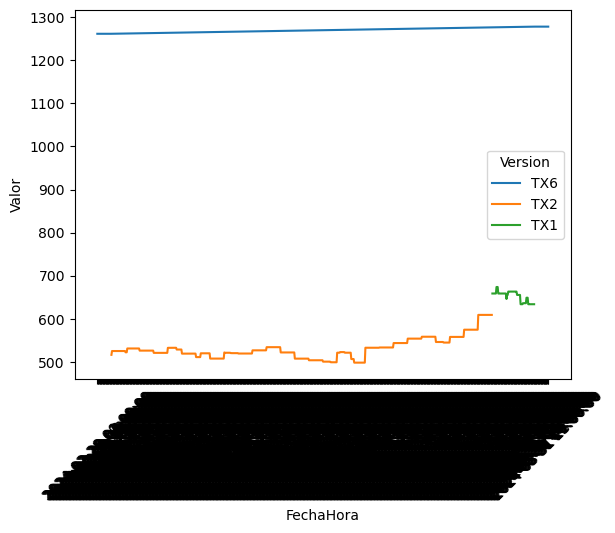

In [115]:
import seaborn as sns 


sns.lineplot(data=df_plot, x='FechaHora', y='Valor', hue="Version")
plt.xticks(rotation=45)
# Show the plot
plt.show()
